In [27]:
import wave
import numpy as np
import matplotlib.pyplot as plt
import speech_recognition as sr
from pydub import AudioSegment
from pydub.playback import play
%matplotlib inline

In [2]:
audio_file_obj = wave.open('en050b.wav', 'r')

In [3]:
signal = audio_file_obj.readframes(-1)

In [5]:
print(signal[:15])

b'\xff\xff\x00\x00\x00\x00\x00\x00\x01\x00\x00\x00\xff\xff\x01'


In [8]:
# features of the signal
print(audio_file_obj.getparams())

_wave_params(nchannels=2, sampwidth=2, framerate=44100, nframes=5518800, comptype='NONE', compname='not compressed')


In [11]:
# converting the signal to a numpy array
signal_np = np.frombuffer(signal, 'int16')

In [12]:
signal_np.shape

(11037600,)

In [13]:
signal_np[:15]

array([-1,  0,  0,  0,  1,  0, -1,  1,  0,  0,  0,  0,  0,  1,  0],
      dtype=int16)

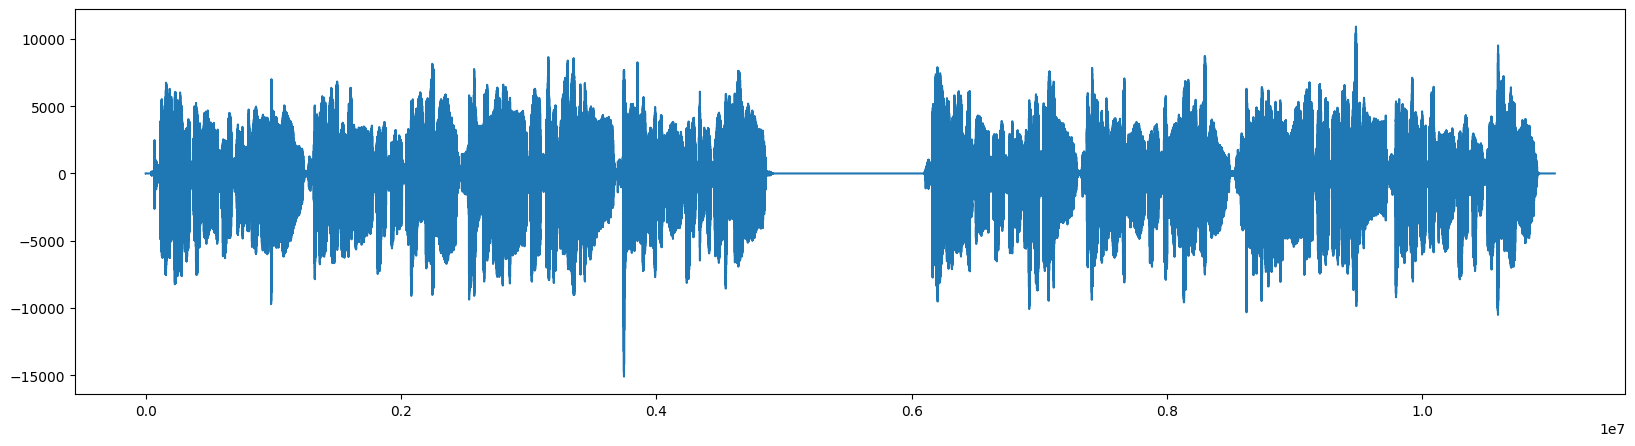

In [15]:
# plotting the signal

plt.figure(figsize=(20, 5))
plt.plot(signal_np)

In [16]:
# timestamps
time = np.linspace(start=0, stop=len(signal_np)/audio_file_obj.getframerate(), num=len(signal_np))

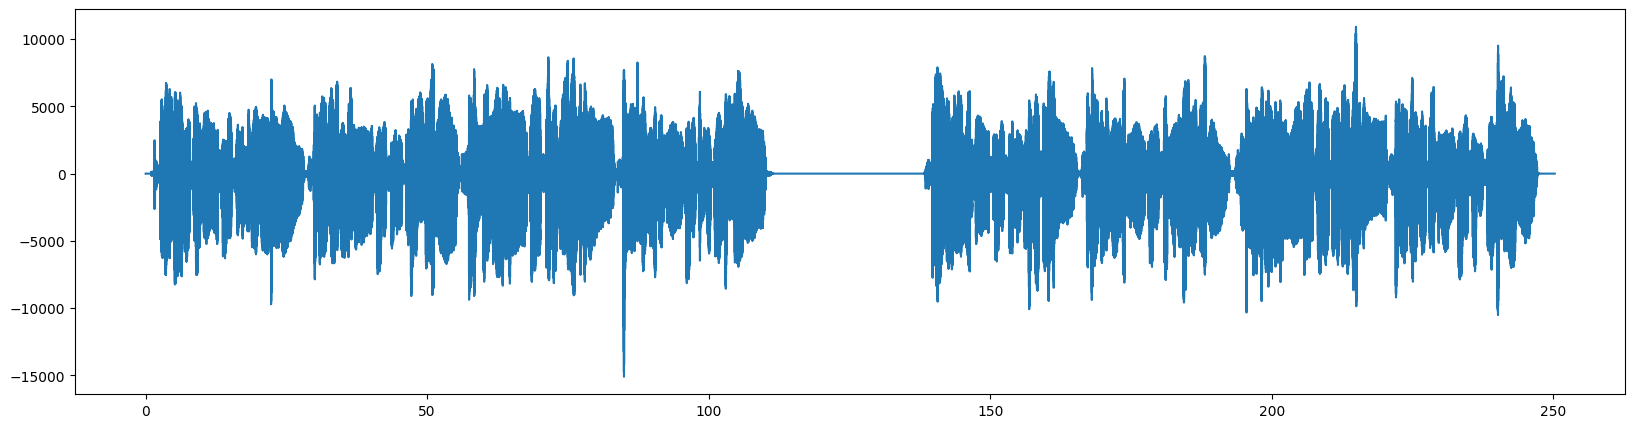

In [18]:
# plotting the signal with timestamps
plt.figure(figsize=(20, 5))
plt.plot(time, signal_np)


In [22]:
# speech recognition
r = sr.Recognizer()


In [23]:
with sr.AudioFile('en050b.wav') as source:
    audio = r.record(source)

In [24]:
r.recognize_google(audio)

"I wonder today to the hill Maggie to wash the scene below the creek and the Earth rust in me Maggie very sad in the long long ago the green Graphics come from the heat Maggie very first day she's probably the creaking Old Mill is still Maggie since you and the world a city So Silent alone Maggie We're The Young and the gay and the bed in Polish White Mansion of storm Maggie happy peaceful friend Frozen Justice Maggie when you and I were young"

In [28]:
# converting the audio file to mp3
sound = AudioSegment.from_wav('en050b.wav')
sound.export('en050b.mp3', format='mp3')

<_io.BufferedRandom name='en050b.mp3'>

In [29]:
# playing the audio file
play(sound)

In [31]:
# checking the features of the audio file

print('frame rate: ', sound.frame_rate)
print('sample width: ', sound.sample_width)
print('frame width: ', sound.frame_width)
print('channels: ', sound.channels)
print('duration: ', sound.duration_seconds)


frame rate:  44100
sample width:  2
frame width:  4
channels:  2
duration:  125.14285714285714


In [32]:
# changing the frame rate
sound_2 = sound.set_frame_rate(16000)
sound_2.export('en050b_2.wav', format='wav')

<_io.BufferedRandom name='en050b_2.wav'>

In [33]:
# playing the audio file
play(sound_2)

In [35]:
# increasing the volume
sound_3 = sound_2 + 20
play(sound_3)

In [37]:
type(sound_3)

pydub.audio_segment.AudioSegment

In [36]:
#low pass filter
sound_4 = sound_3.low_pass_filter(1000)
play(sound_4)

In [40]:
# normalizing the audio file.
# normalizing the audio file means that the audio file will have the same volume
sound_5 = sound_4.normalize() - 30
play(sound_5)

In [46]:
# cutting the audio file
sound_6 = sound_5[3000:]
play(sound_6)

In [47]:
# splitting the audio file into two parts
sound_7 = sound_6.split_to_mono()

In [48]:
play(sound_7[0])

In [49]:
play(sound_7[1])